In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
from numpy.random import randn
import scipy.stats
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [4]:
# Убираем тестеров
df = pd.read_csv(r'C:\Users\Георгий\Projects\46519317-57f0-40df-920b-e0af4d8d54bd.csv')

In [5]:
# Определяем группы А и Б
dftest = df[df['testGroup'].isin(['ComplementOffersA', 'ComplementOffersB'])].drop('count', 1)

a_group = dftest[dftest['testGroup'] == 'ComplementOffersA']
b_group = dftest[dftest['testGroup'] == 'ComplementOffersB']

In [6]:
# Делим группы по платформам
a_group_ios = a_group[a_group['platform'] == 'IPhonePlayer']
b_group_ios = b_group[b_group['platform'] == 'IPhonePlayer']
a_group_andr = a_group[a_group['platform'] == 'Android']
b_group_andr = b_group[b_group['platform'] == 'Android']

In [7]:
# Определяем Межквартильный размах(МКР) для каждого
#МКР это разница между 75% и 25% квартилем. 
#Значения 25% перцентили минус 1.5 х МКР
#Значения 75% перцентили плюс 1.5 х МКР
copy = a_group_ios[(a_group_ios['LTV_2'] > 0) & ((a_group_ios['LTV_2'] > 0) )]
too_big = copy['LTV_2'].quantile(0.75) + 1.5 * (copy['LTV_2'].quantile(0.75) - copy['LTV_2'].quantile(0.25))
too_small = copy['LTV_2'].quantile(0.25) - 1.5* (copy['LTV_2'].quantile(0.75) - copy['LTV_2'].quantile(0.25))
print('a_group_ios - Экстремальные значения выборки для параметра LTV_2 ', too_big, too_small)

too_big = copy['LTV_7'].quantile(0.75) + 1.5 * (copy['LTV_7'].quantile(0.75) - copy['LTV_7'].quantile(0.25))
too_small = copy['LTV_7'].quantile(0.25) - 1.5* (copy['LTV_7'].quantile(0.75) - copy['LTV_7'].quantile(0.25))
print('a_group_ios - Экстремальные значения выборки для параметра LTV_7 ', too_big, too_small)

a_group_ios - Экстремальные значения выборки для параметра LTV_2  17.740000000000002 -6.980000000000001
a_group_ios - Экстремальные значения выборки для параметра LTV_7  22.740000000000002 -9.98


In [8]:
#МКР это разница между 75% и 25% квартилем. 
#Значения 25% перцентили минус 1.5 х МКР
#Значения 75% перцентили плюс 1.5 х МКР
copy = b_group_ios[(b_group_ios['LTV_2'] > 0) & ((b_group_ios['LTV_2'] > 0) )]
too_big = copy['LTV_2'].quantile(0.75) + 1.5 * (copy['LTV_2'].quantile(0.75) - copy['LTV_2'].quantile(0.25))
too_small = copy['LTV_2'].quantile(0.25) - 1.5* (copy['LTV_2'].quantile(0.75) - copy['LTV_2'].quantile(0.25))
print('b_group_ios - Экстремальные значения выборки для параметра LTV_2 ', too_big, too_small)

too_big = copy['LTV_7'].quantile(0.75) + 1.5 * (copy['LTV_7'].quantile(0.75) - copy['LTV_7'].quantile(0.25))
too_small = copy['LTV_7'].quantile(0.25) - 1.5* (copy['LTV_7'].quantile(0.75) - copy['LTV_7'].quantile(0.25))
print('b_group_ios - Экстремальные значения выборки для параметра LTV_7 ', too_big, too_small)

b_group_ios - Экстремальные значения выборки для параметра LTV_2  21.54 -9.260000000000002
b_group_ios - Экстремальные значения выборки для параметра LTV_7  24.265 -10.895


In [9]:
#МКР это разница между 75% и 25% квартилем. 
#Значения 25% перцентили минус 1.5 х МКР
#Значения 75% перцентили плюс 1.5 х МКР
copy = a_group_andr[(a_group_andr['LTV_2'] > 0) & ((a_group_andr['LTV_2'] > 0) )]
too_big = copy['LTV_2'].quantile(0.75) + 1.5 * (copy['LTV_2'].quantile(0.75) - copy['LTV_2'].quantile(0.25))
too_small = copy['LTV_2'].quantile(0.25) - 1.5* (copy['LTV_2'].quantile(0.75) - copy['LTV_2'].quantile(0.25))
print('a_group_andr - Экстремальные значения выборки для параметра LTV_2 ', too_big, too_small)

too_big = copy['LTV_7'].quantile(0.75) + 1.5 * (copy['LTV_7'].quantile(0.75) - copy['LTV_7'].quantile(0.25))
too_small = copy['LTV_7'].quantile(0.25) - 1.5* (copy['LTV_7'].quantile(0.75) - copy['LTV_7'].quantile(0.25))
print('a_group_andr - Экстремальные значения выборки для параметра LTV_7 ', too_big, too_small)

a_group_andr - Экстремальные значения выборки для параметра LTV_2  14.015 -4.745
a_group_andr - Экстремальные значения выборки для параметра LTV_7  19.240000000000002 -7.88


In [10]:
#МКР это разница между 75% и 25% квартилем. 
#Значения 25% перцентили минус 1.5 х МКР
#Значения 75% перцентили плюс 1.5 х МКР
copy = b_group_andr[(b_group_andr['LTV_2'] > 0) & ((b_group_andr['LTV_2'] > 0) )]
too_big = copy['LTV_2'].quantile(0.75) + 1.5 * (copy['LTV_2'].quantile(0.75) - copy['LTV_2'].quantile(0.25))
too_small = copy['LTV_2'].quantile(0.25) - 1.5* (copy['LTV_2'].quantile(0.75) - copy['LTV_2'].quantile(0.25))
print('b_group_andr - Экстремальные значения выборки для параметра LTV_2 ', too_big, too_small)

too_big = copy['LTV_7'].quantile(0.75) + 1.5 * (copy['LTV_7'].quantile(0.75) - copy['LTV_7'].quantile(0.25))
too_small = copy['LTV_7'].quantile(0.25) - 1.5* (copy['LTV_7'].quantile(0.75) - copy['LTV_7'].quantile(0.25))
print('b_group_andr - Экстремальные значения выборки для параметра LTV_7 ', too_big, too_small)

b_group_andr - Экстремальные значения выборки для параметра LTV_2  16.07125 -5.978750000000001
b_group_andr - Экстремальные значения выборки для параметра LTV_7  24.740000000000002 -11.18


In [11]:
# Убираем выбросы согласно МКР +- на глаз

a_group_ios = a_group_ios[a_group_ios['LTV_2'] <= 22]
a_group_ios = a_group_ios[a_group_ios['LTV_7'] <= 27]
a_group_andr = a_group_andr[a_group_andr['LTV_2'] <= 17]
a_group_andr = a_group_andr[a_group_andr['LTV_7'] <= 22]

b_group_ios = b_group_ios[b_group_ios['LTV_2'] <= 26]
b_group_ios = b_group_ios[b_group_ios['LTV_7'] <= 30]
b_group_andr = b_group_andr[b_group_andr['LTV_2'] <= 20]
b_group_andr = b_group_andr[b_group_andr['LTV_7'] <= 28]

In [12]:
# Смотрим средние
a_group_ios['LTV_2'].mean(), a_group_ios['LTV_7'].mean()

(0.02761454647867486, 0.04514160989949117)

In [13]:
# Тест МаннаУитни
stat, p = mannwhitneyu(a_group_ios['LTV_2'], b_group_ios['LTV_2'])
stat, p

(1604944207.5, 0.45544629275494475)

In [14]:
# Результат теста
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Same distribution (fail to reject H0)


In [15]:
# Описываем функцию, которая определяет доверительный интервал
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h, m, m+h

In [16]:
# тут и далее находим доверительные интервалы для выборок
mean_confidence_interval(a_group_andr['LTV_2'], confidence=0.95)

(0.01248219578589805, 0.01446720795568983, 0.01645222012548161)

In [17]:
mean_confidence_interval(a_group_andr['LTV_2'], confidence=0.95)

(0.01248219578589805, 0.01446720795568983, 0.01645222012548161)

In [18]:
mean_confidence_interval(b_group_andr['LTV_7'], confidence=0.95)

(0.023745380017795976, 0.027074532602785563, 0.03040368518777515)

In [19]:
mean_confidence_interval(b_group_andr['LTV_7'], confidence=0.95)

(0.023745380017795976, 0.027074532602785563, 0.03040368518777515)

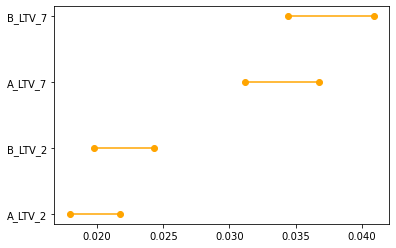

In [20]:
# Строим доверительные интервалы, в переменных data_dict записываем полученные раннее интервалы
data_dict = {}
data_dict['category'] = ['A_LTV_2','B_LTV_2','A_LTV_7','B_LTV_7']
data_dict['lower'] = [0.0179284955583883, 0.01976633480932951, 0.03120017987049553, 0.03442411099426219]
data_dict['upper'] = [0.021767960068966963, 0.02426898934093419, 0.03679673806633514, 0.0409254374112269]
dataset = pd.DataFrame(data_dict)
for lower,upper,y in zip(dataset['lower'],dataset['upper'],range(len(dataset))):
    plt.plot((lower,upper),(y,y),'ro-',color='orange')
plt.yticks(range(len(dataset)),list(dataset['category']))
plt.show()